# Multiple Hypothese Testing

**1. Project Description**

This is a group project in course **STA4010 Selected Topics in Statistics I** delivered by Prof. Anna Choi (Stanford) and Prof. Ka Wai Tsang (CUHKSZ) in 2017 fall semester at CUHKSZ.

This courses topics include: Multiple Hypothese Testing, Family-wise Error rate (FWER), False Discovery Rate (FDR), Resampling methods, Bayesian Analysis, Time Series Analysis, etc.

*Project Question and Requirements*

This project uses the data set [**Project_data.csv**](https://github.com/floydluo/mht/blob/master/Project_data.csv) provided in class. The data set contains the log returns of S&P500 and 100 stocks in US market from Sept. 7, 2016 to Sept 7, 2017. The goal is to identify which stocks have the Jension index greater than 0. We assume that the returns of each particular stocks are independent and the interest rate is 0.016 (annual). Note that the returns among the stocks can be correlated.

​	(1) Identify the stocks with positive Jensen Index with $FWER \leq 0.05$

​	(2) Explain your methods and why they could control $FWER \leq 0.05$

**2. Methods and Tools**

**Statistical Methods**

1. p-values from Simple Linear Regression 
2. Closed Testing Proceduce
3. Holm's Step-down Procedure
4. Hochberg's Step-up Procedure
5. Tests for Independence
6. [Jonathan Taylor's Condtional p-values for Hypothesis Test](https://pdfs.semanticscholar.org/f775/729a65da59b2e503cb2e7479f9a2a681fa51.pdf)
7. Tests for Normalirity
8. Hybrid Resampling Method

**Language and Platforms**

1. This Project was developed with R kernel in Jupyter Notebook. 

2. You can access the whole project source code and data via: https://github.com/floydluo/mht

**3. Group Members and Credits**

Among the five members, Zhen LIN and I (Junjie LUO) proposed the statistical ideas. Junjie LUO completed the R codes and made this this project report.


## 1. Process the data

In [1]:
library(MASS)

data = read.csv('Project_data.csv')
data = na.omit(data)
data[1:15,]
dim(data)
part1 = data

SP500,X1..IBM,X2.MMM,X3.ABI,X4.AP3.SG,X5.ALB,X6.ALGN,X7.ALLE,X8.MO,X9.AEE,⋯,X91.GS,X92.HAL.HA,X93.HAS.BE,X94.HSY,X95.HD,X96.HPQ,X97.HUM,X98.HBANP,X99.ILMN,X100.MSF.SG
-0.002182789,-0.016467499,0.001945355,0.001108383,-0.009273338,-0.024776922,-0.009285882,-0.014349935,-0.004807772,-0.003404336,⋯,-0.018164540,-0.010065730,-0.032574520,-0.019663948,-0.027183127,-0.039029321,0.000453274,0.025510007,-0.031174152,-0.002837872
-0.024816070,-0.021037284,-0.025075822,-0.035328748,-0.020524783,-0.051996020,-0.038575229,-0.044627317,-0.043712718,-0.036568239,⋯,0.014663053,0.029898703,0.018832033,0.013425824,0.006632122,0.038266002,0.001585155,-0.019071260,0.034930245,-0.019094536
0.014625446,0.016561891,0.013908716,0.002369064,-0.013432829,0.008038494,0.014385646,0.008196259,0.017312973,0.016508775,⋯,-0.024020437,-0.019062788,-0.011181648,-0.015194886,-0.022571870,-0.021626115,-0.005615871,0.022469034,-0.003285886,0.011974389
-0.014632879,-0.015791592,-0.011463383,-0.009972319,-0.016619429,-0.013640369,-0.012317821,-0.010161529,-0.007993117,-0.015676975,⋯,-0.005042660,0.004991444,-0.004194178,-0.000312506,0.004286115,0.006326863,-0.004561305,-0.023336592,0.009534217,-0.006793636
-0.000517432,-0.011360065,-0.002559217,-0.002895272,-0.017163094,-0.004874429,0.004014490,-0.007386921,-0.006789307,0.008075416,⋯,0.011488867,0.000000000,0.020858661,0.000312506,0.005528723,0.015989202,-0.001200798,0.010362863,0.018228487,-0.003224898
0.010222886,0.010396993,0.005508101,0.021682856,0.006163597,0.020004565,0.006260837,0.011433948,0.002057487,0.003294290,⋯,-0.012452281,0.000382876,0.008137849,-0.005535541,-0.006717557,0.002066860,-0.000915859,-0.000694596,-0.011324895,0.016687876
-0.003770003,-0.011761030,-0.008701956,-0.015785433,-0.002214408,-0.006754163,0.009744640,-0.009015735,-0.007140060,0.014893675,⋯,0.001264362,-0.000765977,-0.009921142,-0.000314314,0.001426369,0.002062526,-0.000229011,0.003439725,0.001040061,0.004597317
-0.000007390,0.006672834,0.009437862,0.009676172,0.009598953,0.011790002,0.003085612,0.016764212,-0.001274698,0.013277177,⋯,0.001562957,-0.015055355,0.001967579,0.000733099,0.004266755,-0.001374545,-0.000343744,0.004104057,0.015188766,-0.004989529
0.000309998,-0.002715570,0.004967289,-0.035447455,0.004154321,-0.011008257,-0.004578616,-0.000148463,0.003978075,0.001198264,⋯,0.003358312,0.016586684,0.012695495,0.008755570,0.010041607,0.030479822,0.007591979,-0.010291674,0.014961431,-0.000569034
0.010870041,0.006968273,0.011142638,0.020839962,0.003100522,0.043324309,0.017351251,0.007690155,0.008381490,0.020546020,⋯,0.005909560,0.000382437,0.014451082,-0.002077676,0.004983338,0.008635100,0.000795910,-0.006920375,0.004974990,0.012948081


[1] 251 101

## 2. Linear Regression With Normal Assumption

Under the Assumption that 

for these Stock,

Stocks' Returns are **Independent** and **Normal Distribution**.

> We will test Independent Assumption in Section 5 and test Normal Assumption in Section 7.


In [2]:
# In the question, the return is 0.016, as this is the annual return
# To get the daily return, divide it by 360.

rf <- 0.016/360

JenIndex = c()
pvalue   = c()
part1t <- part1 - rf

StockName= c()
JenIndex = c()
pvalue   = c()
part1t <- part1 - rf

Market = part1t[,1]

The null and alternative hypotheses are:

$$ H_{0}: \beta_{0} = 0$$
$$ H_{1}: \beta_{0} \geq 0 $$

So they are two-sided tests.

It is wrong to derive the p-value from `summary(lm)` directly.

Instead, we need to extract T statistics from `summary(lm)` and 

then calculate the p-value manually.

In [3]:
for (i in 2:101) {
    lm.par1 <- lm(part1t[,i] ~ Market)
    s <- summary(lm.par1)
    tp <- s$coefficients[1,3]
    StockName=c(StockName, colnames(part1t)[i])
    JenIndex =c(JenIndex, round(s$coefficients[1,1][[1]],8))
    pvalue <- c( pvalue,round(pt(tp, df = 249,lower.tail = FALSE),8))
}

Combine them together

In [4]:
library(plyr)
result = data.frame(cbind(StockName, JenIndex, pvalue))
# class(result)
result = arrange(result, pvalue)
result[, 2] <- as.numeric(as.character( result[, 2] ))
result[, 3] <- as.numeric(as.character( result[, 3] ))
result[1:15,]

StockName,JenIndex,pvalue
X23.BA,0.00183640,0.00212794
X66.DXC,0.00245666,0.00937999
X78.FMC,0.00255816,0.00999499
X86.GD,0.00114604,0.02861545
X97.HUM,0.00138602,0.03408030
X12.AAPL,0.00108710,0.04246088
X44.C,0.00132215,0.04327062
X74.FDX,0.00117197,0.04756679
X81.FTV,0.00097895,0.05328660
X72.FB,0.00114711,0.05328791


In [5]:
m = length(pvalue)
alpha = 0.05
P <- c()
for (k in 1:m) {
  P[k]<- round(alpha/(m+1-k),8)
}

result['P'] = P
result['LessEqP'] = pvalue <= P
result[1:15,]

StockName,JenIndex,pvalue,P,LessEqP
X23.BA,0.00183640,0.00212794,0.00050000,FALSE
X66.DXC,0.00245666,0.00937999,0.00050505,FALSE
X78.FMC,0.00255816,0.00999499,0.00051020,FALSE
X86.GD,0.00114604,0.02861545,0.00051546,FALSE
X97.HUM,0.00138602,0.03408030,0.00052083,FALSE
X12.AAPL,0.00108710,0.04246088,0.00052632,FALSE
X44.C,0.00132215,0.04327062,0.00053191,FALSE
X74.FDX,0.00117197,0.04756679,0.00053763,FALSE
X81.FTV,0.00097895,0.05328660,0.00054348,FALSE
X72.FB,0.00114711,0.05328791,0.00054945,FALSE



## 3. Use Holm's Step-down Procedure


As the result shows, 

None of the null hypotheses is rejected.

In [6]:
spvalue = result$pvalue

# Holm's step-down procedure

StepDown = rep("Accept", m)

for (k in 1:m) {
    if (spvalue[k] > alpha/(m+1-k)) {
        break
    }
    StepDown[k] = 'Reject'
}

StepDown

[1] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
  [9] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [17] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [25] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [33] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [41] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [49] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [57] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [65] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [73] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [81] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [89] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [97] "Accept" "Accept" "Accept" "Accept"

**1. Our Decision on Null Hypotheses **


According to Holm’s step-down procedure, 

we order the p-values of the 15 stocks as 

$$p_{(1)} < p_{(2)} < … < p_{(m)}$$


for $\alpha = 0.5$, 

the minimal index of k such that 

$$p_{k} > \frac{0.05}{(m + 1 - k)}$$

is

$$ k = 1$$ 

i.e. none of the null hypotheses are rejected. 

Then $FWER \leq 0.05$



**2. Why could it control FWER **

The Holm’s step down procedure can control FWER is because: 

if no rejection, then no false rejection. 

If $H_{1}$ is rejected, 

then $p_{(1)} \leq \frac{\alpha}{m}$

and thus all hypotheses contain $H_1$ can be rejected at $\alpha$-level. 

If $H_2$ is also rejected, then  $p_{(2)} \leq \frac{\alpha}{m}$,

the maximum size of the remaining hypothesis is $m – 1$.

Therefore, all hypotheses with $H_2$ can also be rejected at $\alpha$-level. 


Repeating this, all hypothesis contain the rejected set can be rejected at alpha-level. By closed testing procedure, $FWER \leq \alpha$.

----


## 4. Use Hochberg's Step-up Procedure

As the result shows, 

None of the null hypotheses is rejected.

In [7]:
# Hochberg's step-up procedure
StepUp <- rep("Reject", m)
for (k in m:1) {
    if (spvalue[k]<= alpha/(m+1-k)) {
        break
    }
    StepUp[k] = 'Accept'
}

StepUp

[1] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
  [9] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [17] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [25] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [33] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [41] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [49] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [57] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [65] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [73] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [81] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [89] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [97] "Accept" "Accept" "Accept" "Accept"

**Results and Analyisis**

According to Hochberg’s step-up procedure, 

we ordered the p-values as 

$$p_{(1)} < p_{(2)} < … < p_{(m)}$$

for $\alpha$ $= 0.5$, no null hypotheses are rejected. 

Then $FWER\leq 0.05$.


The reason why Hochberg’s step-up procedure can control FWER is similar as before: 

If no rejection, then no false rejection. 

If $H_{(1)}$ is rejected, then $p_{(1)} \leq \frac{\alpha}{m}$. 

Repeating this, all hypothesis contain the rejected set can be rejected at alpha-level. 

By closed testing procedure, $ FWER \leq \alpha$.

In [8]:
result$StepDown = StepDown
result$StepUp   = StepUp
result[1:15,]

write.csv(result, 'result_Normal.csv')

StockName,JenIndex,pvalue,P,LessEqP,StepDown,StepUp
X23.BA,0.00183640,0.00212794,0.00050000,FALSE,Accept,Accept
X66.DXC,0.00245666,0.00937999,0.00050505,FALSE,Accept,Accept
X78.FMC,0.00255816,0.00999499,0.00051020,FALSE,Accept,Accept
X86.GD,0.00114604,0.02861545,0.00051546,FALSE,Accept,Accept
X97.HUM,0.00138602,0.03408030,0.00052083,FALSE,Accept,Accept
X12.AAPL,0.00108710,0.04246088,0.00052632,FALSE,Accept,Accept
X44.C,0.00132215,0.04327062,0.00053191,FALSE,Accept,Accept
X74.FDX,0.00117197,0.04756679,0.00053763,FALSE,Accept,Accept
X81.FTV,0.00097895,0.05328660,0.00054348,FALSE,Accept,Accept
X72.FB,0.00114711,0.05328791,0.00054945,FALSE,Accept,Accept


**SUMMARY OF THESE TWO METHODS**


We discover that with the used of our method, 

the null hypothesis can't be rejected

i.e. $ \beta_{0} = 0 $ can't be rejected.

So there are no stocks with positive Jensen index when controling  $FWER \leq 0.05.$  

This result is not very surprise because positive Jensen index is difficult to find and will change with the time. 

From the financial perspective:


According to the theory, the gains from the market can be divided into two parts: the first part is the expected return from the market risk part, which is the Beta benefit. 

The second part is the Alpha yield obtained through the active management of investors and taking risks. At here Alpha yield is another saying of Jensen index. 

Usually, most of people cannot win the market, so the excess earnings will be negative. 

It seems that we should try more methods to find stocks with positive Jensen index.  

## 5. Tests of the Assumption that Stocks' Returns are Independent


**Motivation**:

In order to check whether Taylor Method could be used to **reject** some null hypotheses,

we need first know $y$'s distribution. 

As required in the note, that $y$ should:

$$ \mathbf {y} \ \sim \ {\mathcal {N}}({\boldsymbol {\theta }},\,{\boldsymbol {\Sigma }})$$

where $y$ is derived from p-values.

But we don't know whether the p-values are independent with each other or not.

And we don't know $\Sigma$ in this distribution.

> For more information about Taylor Method, please see [Taylor et al. (2014)](https://pdfs.semanticscholar.org/f775/729a65da59b2e503cb2e7479f9a2a681fa51.pdf).

------

If the stocks are independent to each other, 

then we could conclude that p-values are also independent to each other. 

Under this independence assumption, we could use 

$$ \Sigma = I $$ 

as the covariance matrix.


In this section, we will test that

whether the stocks are independent to each other.

In [9]:
cormat <- cor(part1t[,-1])

# number of |correlation| > 0.7
(sum(abs(cormat)>0.7)-100)/2

# number of |correlation| > 0.6
(sum(abs(cormat)>0.6)-100)/2

# number of |correlation| > 0.5
(sum(abs(cormat)>0.5)-100)/2

# number of |correlation| > 0.4
(sum(abs(cormat)>0.4)-100)/2

[1] 12

[1] 22

[1] 41

[1] 110

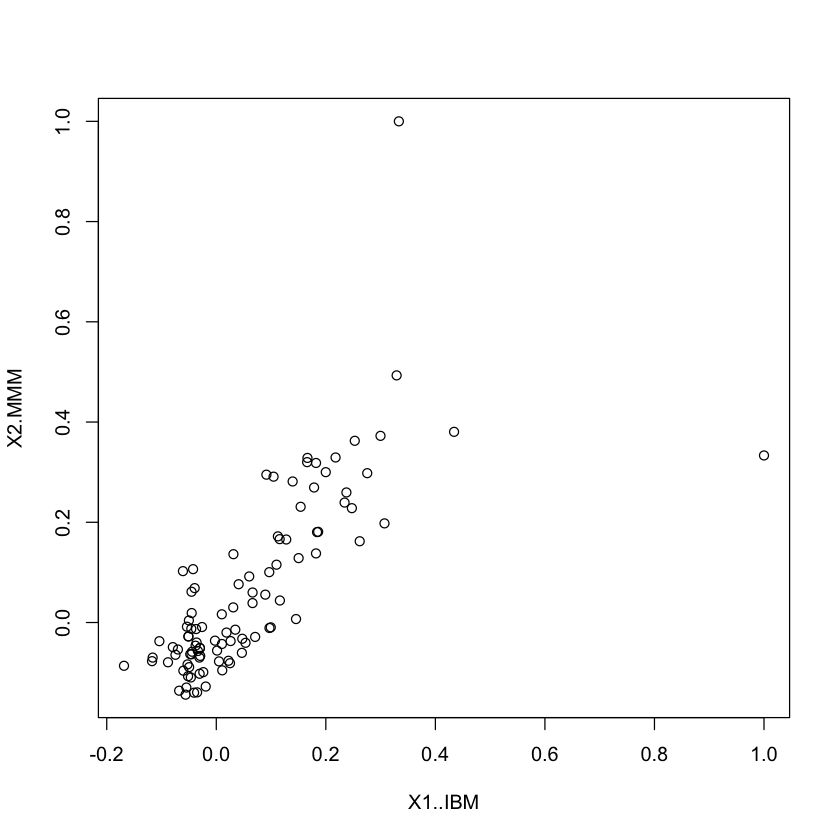

In [10]:
plot(cormat)


**1. Conclusion**

They are dependent to each other.

**2. Reasons**   

The definition of correlation is that it ranges from -1 to 1 

and it is independent between two item if correlation = 0. 



According to the correlation picture above, 

we can find the points are distributed in a line that has a slope close to one. 

And we analysis the absolute value of correlation, the result is there are 12 stocks have |correlation| more than 0.7,  which are strong correlated. 

Moreover, 110 of them have correlations more than 0.4. 

Thus, we conclude that the stocks are **dependent** with each other.

**3. Plan**

In order to use Taylor Method, 

we will use hybrid resampling to estimate $\Sigma$ in Next Section 4.3.


## 6. Taylor Method Under Normal Assumption

Here we utilize Taylor Method under the normal assumption, 

but we give up the assumption that stocks' returns are independent to each other.

### 6.1 Source Code for Tayler Method


**1.**


$$ F^{[a,b]}_{\mu, \sigma^2}(x) = \frac{\Phi((x-\mu)/\sigma) -  \Phi((a-\mu)/\sigma)}{\Phi((b-\mu)/\sigma) -  \Phi((a-\mu)/\sigma)}$$

In [11]:
#***********************
#     SOURCE CODE      #
#***********************

Ffun = function(a, b, mu, si, x){
    xs = (x - mu)/si
    as = (a - mu)/si
    bs = (b - mu)/si
    
    f = function(y) (1/y-1/y^3+3/y^5-15/y^7);
    
    if (as > 4 & bs > 4){
        F = 1 - (exp((as^2-bs^2)/2)*f(bs) - exp((as^2-xs^2)/2)*f(xs))/(exp((as^2-bs^2)/2)*f(bs) - f(as))
    }
    else if (as < -4 & bs < -4){
        F = ( exp((bs^2-xs^2)/2)*f(-xs) - exp((bs^2-as^2)/2)*f(-as))/( f(-bs)-exp((bs^2-as^2)/2)*f(-as))
    }
    else{
        denom = pnorm(bs)-pnorm(as)
        if (denom < 0.00001){
            F <- (xs-as)/(bs-as)
        }
        else{
            F <- (pnorm(xs)-pnorm(as))/denom
        }
    }
    return(F)
}


**2.**

$$ \mathbf {y} \ \sim \ {\mathcal {N}}({\boldsymbol {\theta }},\,{\boldsymbol {\Sigma }})$$

$$ \rho = \frac{\Gamma\Sigma v}{v^{T}\Sigma v}$$

$$V^{lo} = \max_{j:\rho_{j}>0} \frac{\mu_j - (\Gamma y)_{j} + \rho_{j}v^{T}y}{\rho_{j}}$$

$$V^{up} = \min_{j:\rho_{j}<0} \frac{\mu_j - (\Gamma y)_{j} + \rho_{j}v^{T}y}{\rho_{j}}$$

$$p^{*} = 1 − F^{[V^{lo}, V^{up}]}_{0, v^{T}\Sigma v}(v^{T}y)$$


$p^{*}$ is the taylor p-value which we want to get.



In [12]:

GetTaylerPValue <- function(Zs, Sigma, u, v, Gamma){
    
    # calculate rho
    tmp = Sigma%*%v
    A = v%*%tmp
    rho = (Gamma%*%tmp)/A[1,1]
    
    # calculate Vs in order to find Vup, Vlo
    Vs = (u- (Gamma%*%Zs) + rho*sum(v*Zs))/rho
    if (sum(rho<0)==0){
        Vup <- Inf
    } 
    else{
        Vup <- min(Vs[rho<0])
    }
    
    if (sum(rho>0)==0){
        Vlo <- -Inf
    } 
    else {
        Vlo <- max(Vs[rho>0])
    }
    # here we have Vlo, Vup, v, 
    a  = Vlo
    b  = Vup
    mu = 0
    si = A[1,1]
    x  = sum(v*Zs)
    p_tmp = Ffun(a, b, mu, si, x)
    
    p_tayler = 1- p_tmp
    #p_tayler = p_tmp
    return(p_tayler)
}


**3. **

Combine them together

In [13]:
# Zs is normal distributed, transformed from p-value, well sorted
# must be sorted before taken as the input
# under Zs ~ N(theta, Sigma)
# here we need to test theta, so, don't take it as the input

Taylor <- function(Zs, Sigma){
    # length of Zs
    # Zs = sort(rnorm(100), decreasing = T)
    len = length(Zs)
    
    alpha = 0.05
    Z_alpha = qnorm(alpha, lower.tail = F)
    
    # the number that bigger than the desired value
    rlen = sum(Zs >= Z_alpha )
    
    # Get Gamma Matrix
    Gamma = rep(1,len)
    Gamma = diag(Gamma)
    Gamma = Gamma[1:rlen,]
    
    # Get u vector 
    u = rep(Z_alpha, rlen) 
    
    Taylor_PValues <- rep(0,rlen)
    for (idx in 1:rlen){
        v = rep(0,len)
        v[idx] = 1
        Taylor_PValues[idx] = GetTaylerPValue(Zs, Sigma, u, v, Gamma)
    }
    return(sort(Taylor_PValues))
}




### 6.2 Prepare the Data Where p-values are Bigger Than 0.05

In [14]:
result = result[,c(1,2,3)]
result[1:15,]

StockName,JenIndex,pvalue
X23.BA,0.00183640,0.00212794
X66.DXC,0.00245666,0.00937999
X78.FMC,0.00255816,0.00999499
X86.GD,0.00114604,0.02861545
X97.HUM,0.00138602,0.03408030
X12.AAPL,0.00108710,0.04246088
X44.C,0.00132215,0.04327062
X74.FDX,0.00117197,0.04756679
X81.FTV,0.00097895,0.05328660
X72.FB,0.00114711,0.05328791


Get the $y$ vector. (In this context, it is `Zs`)

The elements in y vector is decreasing.

In [15]:
Zs = qnorm(result$pvalue, lower.tail = F)
result$Zs = Zs
result_Taylor = result[result$Zs >= qnorm(alpha, lower.tail = F), ]
result_Taylor

StockName,JenIndex,pvalue,Zs
X23.BA,0.00183640,0.00212794,2.858546
X66.DXC,0.00245666,0.00937999,2.350266
X78.FMC,0.00255816,0.00999499,2.326536
X86.GD,0.00114604,0.02861545,1.901543
X97.HUM,0.00138602,0.03408030,1.823944
X12.AAPL,0.00108710,0.04246088,1.722816
X44.C,0.00132215,0.04327062,1.713932
X74.FDX,0.00117197,0.04756679,1.668918


### 6.3 Use Resample to Find the Covariance Matrix of Zs: Sigma

In [16]:
# resampling to find covariance matrix of z
Z <- c()
x <- part1t[,1]
n <- length(x)
numBoot = 200
for (i in 2:101) {
    y<-part1t[,i]
    l <- lm(y~x)
    epshat <- residuals(l)
    z<-c()
    for (b in 1:numBoot) {
        y.b <- predict(l) + sample(epshat,n,replace = T)
        lb <- lm(y.b~x)
        s <- summary(lb)
        tp <- s$coefficients[1,3]
        pvalue <- pt(tp,df=249,lower.tail = FALSE)
        z[b] <- qnorm(pvalue,lower.tail = F)
    }
    Z<-cbind(Z,z)
}

dim(Z)

[1] 200 100

In [17]:
Zs = Zs[Zs!=-Inf]

#Sigma = diag(length(Zs))
Sigma <- cov(Z)
dim(Sigma)

[1] 100 100

### 6.4 Calculate and Evaluate Taylor Method p-values

In [18]:
taylor_pvalue = Taylor(Zs, Sigma)
taylor_pvalue

[1] 0.009663037 0.112232148 0.187796233 0.379083064 0.415026857 0.833756922
[7] 0.848724012 0.929958864

In [19]:
m = length(taylor_pvalue)
alpha = 0.05
taylor_P <- c()
for (k in 1:m) {
  taylor_P[k]<- alpha/(m+1-k)
}

taylor_P

[1] 0.006250000 0.007142857 0.008333333 0.010000000 0.012500000 0.016666667
[7] 0.025000000 0.050000000

In [20]:
result_Taylor$taylor_pvalue = taylor_pvalue
result_Taylor = arrange(result_Taylor, taylor_pvalue)
result_Taylor[, 5]  <- as.numeric(as.character( result_Taylor[, 5] ))
result_Taylor$taylor_P = taylor_P
result_Taylor$LessEqP = taylor_pvalue <= taylor_P
result_Taylor

StockName,JenIndex,pvalue,Zs,taylor_pvalue,taylor_P,LessEqP
X23.BA,0.00183640,0.00212794,2.858546,0.009663037,0.006250000,FALSE
X66.DXC,0.00245666,0.00937999,2.350266,0.112232148,0.007142857,FALSE
X78.FMC,0.00255816,0.00999499,2.326536,0.187796233,0.008333333,FALSE
X86.GD,0.00114604,0.02861545,1.901543,0.379083064,0.010000000,FALSE
X97.HUM,0.00138602,0.03408030,1.823944,0.415026857,0.012500000,FALSE
X12.AAPL,0.00108710,0.04246088,1.722816,0.833756922,0.016666667,FALSE
X44.C,0.00132215,0.04327062,1.713932,0.848724012,0.025000000,FALSE
X74.FDX,0.00117197,0.04756679,1.668918,0.929958864,0.050000000,FALSE


In [21]:
spvalue = result_Taylor$taylor_pvalue
m = length(spvalue)

# Holm's step-down procedure
StepDown = rep("Accept", m)

for (k in 1:m) {
    if (spvalue[k] > alpha/(m+1-k)) {
        break
    }
    StepDown[k] = 'Reject'
}

# Hochberg's Step-up Procedure
StepUp = rep("Reject", m)

for (k in 1:m) {
    if (spvalue[k] <= alpha/(m+1-k)) {
        break
    }
    StepUp[k] = 'Accept'
}

result_Taylor$StepDown = StepDown
result_Taylor$StepUp   = StepUp
result_Taylor

write.csv(result_Taylor, 'result_normal_Taylor.csv')

StockName,JenIndex,pvalue,Zs,taylor_pvalue,taylor_P,LessEqP,StepDown,StepUp
X23.BA,0.00183640,0.00212794,2.858546,0.009663037,0.006250000,FALSE,Accept,Accept
X66.DXC,0.00245666,0.00937999,2.350266,0.112232148,0.007142857,FALSE,Accept,Accept
X78.FMC,0.00255816,0.00999499,2.326536,0.187796233,0.008333333,FALSE,Accept,Accept
X86.GD,0.00114604,0.02861545,1.901543,0.379083064,0.010000000,FALSE,Accept,Accept
X97.HUM,0.00138602,0.03408030,1.823944,0.415026857,0.012500000,FALSE,Accept,Accept
X12.AAPL,0.00108710,0.04246088,1.722816,0.833756922,0.016666667,FALSE,Accept,Accept
X44.C,0.00132215,0.04327062,1.713932,0.848724012,0.025000000,FALSE,Accept,Accept
X74.FDX,0.00117197,0.04756679,1.668918,0.929958864,0.050000000,FALSE,Accept,Accept


----

**1. Conclusion**

After using Taylor method, we accept all null hypotheses.

**2. Analysis**

We have tried Taylor method to calculate `taylor_pvalue`, 

**1**

The result is that we still cannot reject any null hypothesis, 

that is to say, 

we still cannot find stocks with positive Jensen index. 

**2**

The reason for using Taylor method:

As we have already choose 15 stocks with p-value less than $\alpha$ = 0.05, 

clearly these stocks' p-values are not $U(0,1)$ distributed under all the null hyptheses any more.

Therefore, directly applying the step-down or step-up procedure may give us a wrong answer. 

**3** 

In this case, the stocks are not independent, 

so the p-values are not independent. 

We cannot use $I$ as its covariance,

To get an estamtor for Zs's covariance matrix,

we use resampling method, 

the result is `Sigma` in the codes.

**4**

So we try to calculate the conditional p-values with the use of taylor method to see whether the result will be different. 

**5**

However, apparently, the result is the same: we still accept all $H_0$s.

----

## 7. Tests of  Normaliarity of Stock Returns

**1**

The above result is derived on the assumption that:

These stocks' returns are **Independent** and **Normal Distribution**

**2**

As the Dataset is too big,

10 stocks are randomly selected to do the test.


**3**

We will test this assumption by the following two methods

The method  **QQ-Plot** and method **Shaprio-Wilk test**.

In [22]:
# prepare the ramdomly selected stocks

index <- sample(2:101, 10, replace = F)

x <- part1t[,1]

### 7.1 QQ-Plot

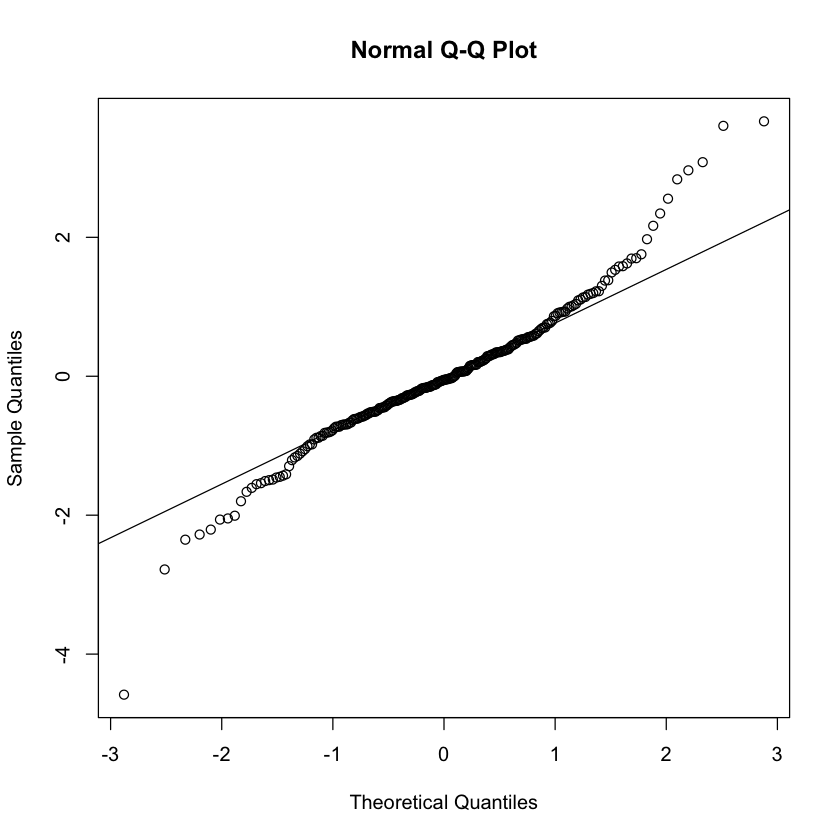

In [23]:
# test for normal by qqplot

stdres <- c()

l1 <- lm(part1t[,index[1]] ~ x)
qqnorm(studres(l1))
qqline(studres(l1))
stdres <- cbind(stdres,studres(l1))


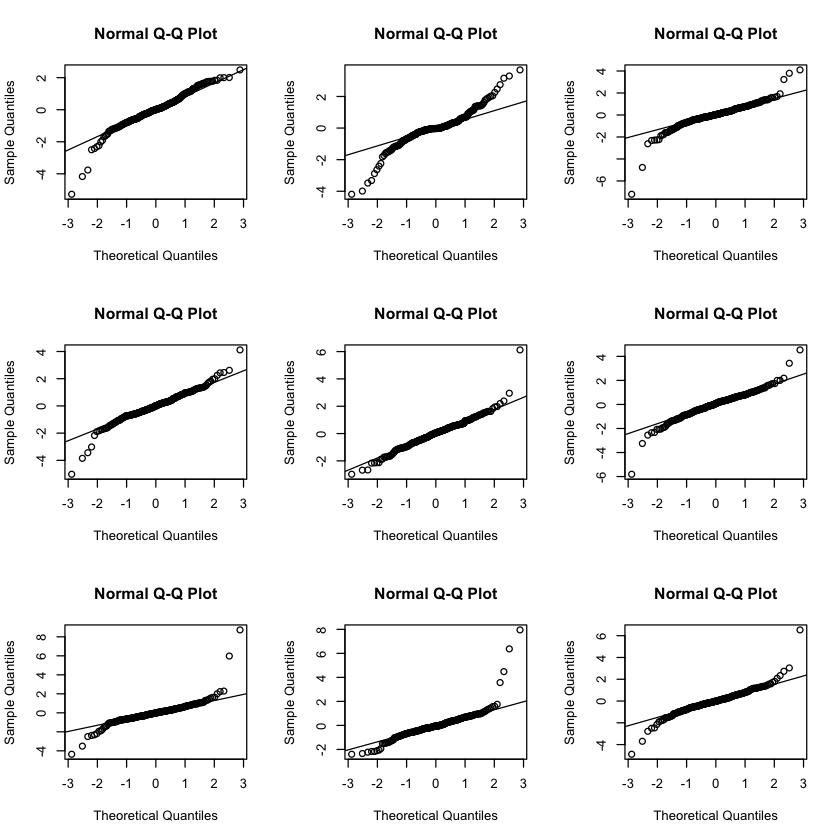

In [24]:
par(mfrow = c(3,3))

l2 <- lm(part1t[,index[2]]~x)
qqnorm(studres(l2))
qqline(studres(l2))
stdres<-cbind(stdres,studres(l2))

l3 <- lm(part1t[,index[3]]~x)
qqnorm(studres(l3))
qqline(studres(l3))
stdres<-cbind(stdres,studres(l3))

l4 <- lm(part1t[,index[4]]~x)
qqnorm(studres(l4))
qqline(studres(l4))
stdres<-cbind(stdres,studres(l4))

l5 <- lm(part1t[,index[5]]~x)
qqnorm(studres(l5))
qqline(studres(l5))
stdres<-cbind(stdres,studres(l5))

l6 <- lm(part1t[,index[6]]~x)
qqnorm(studres(l6))
qqline(studres(l6))
stdres<-cbind(stdres,studres(l6))

l7 <- lm(part1t[,index[7]]~x)
qqnorm(studres(l7))
qqline(studres(l7))
stdres<-cbind(stdres,studres(l7))

l8 <- lm(part1t[,index[8]]~x)
qqnorm(studres(l8))
qqline(studres(l8))
stdres<-cbind(stdres,studres(l8))

l9 <- lm(part1t[,index[9]]~x)
qqnorm(studres(l9))
qqline(studres(l9))
stdres<-cbind(stdres,studres(l9))

l10 <- lm(part1t[,index[10]]~x)
qqnorm(studres(l10))
qqline(studres(l10))
stdres<-cbind(stdres,studres(l10))


---

From above Graph, we could conclude that the normal assumption is rejected.

---

### 7.2 Shapiro–Wilk test



**1**

The Shapiro–Wilk test tests the null hypothesis 

that **a sample **$x_1$, ..., $ x_n$**came from a normally distributed population.**



**2**

The test statistic is

$$ {\displaystyle W={\left(\sum _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}},}$$


Where

* $x_{{(i)}}$ (with parentheses enclosing the subscript index i) is the ith order statistic, 

    i.e., the ith-smallest number in the sample;

    ​

* $\overline {x}=\left(x_{1}+\cdots +x_{n}\right)/n$ is the sample mean;



* the constants $a_{i}$ are given by $

  $$   {\displaystyle (a_{1},\dots ,a_{n})={m^{\mathsf {T}}V^{-1} \over (m^{\mathsf {T}}V^{-1}V^{-1}m)^{1/2}}} $$

  where 

  $$  m=(m_{1},\dots ,m_{n})^{{{\mathsf  {T}}}}\,$$

  and $ m_{1},\ldots ,m_{n}$ are the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution, and $ V$ is the covariance matrix of those order statistics.



**3**

In R, we could use `shapiro.test` to test whether a sample is derived from normal distribution, by:
```R
> shapiro.test(rnorm(100, mean = 5, sd = 3))

	Shapiro-Wilk normality test

data:  rnorm(100, mean = 5, sd = 3)
W = 0.97084, p-value = 0.02563
```


In [25]:
# shapiro test
rej <-c()
for (i in 1:10) {
    sh <- shapiro.test(stdres[,i])
    rej[i] <-(sh$p.value<=0.05) 
}

rej

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

**1**


In this test, the normal assumption is rejected,

Altough from the Q-Q plot, 

we can see that points nearly fit a line in the middle,

which may indicate the stocks' returns are normal distributed.


However, the close analysis will show they are not normal distributed.

**2**

Even the qq-plot shows the evidence that the Normal assumption is held.

The normal Q-Q plot is used to test the normaliarity of a distribution. 

Q-Q diagrams can be used to visualize the evaluation parameters in a distributed position - scale category. 

If two distributions are similar, the Q-Q graph tends to fall on the y=x line. 

If the two distributions are linearly dependent, the points tend to fall on a straight line, but not necessarily on the y=x line. 


According to the Q-Q plots in the graph, which compare the theoretical normal percentiles and the sample percentiles, 

we find that in the middle part of plots, almost every sample point is located along the straight line.

However, the sample points around head and tail are not located along the line. 

So the sample distribution is not normal.

**4**

the Shapiro–Wilk test shows that Normal assumption is not reliable.


**5** 

From the financial perspectives, 

the returns are actually time series data, so they are independent of each other. 

So the test statistics we got are not so reliable.


**6**

In case assumption is not held, 

we need to deal this problem without Normal Assumption

In next section, we will use **Resampling Method**

## 8. Hybrid Resampling

### 8.1 Source Code for Hybrid Resampling


In [26]:
GetBootStat <- function(b, Xbeta_theta, epshat, n){
    y.b <- Xbeta_theta + sample(epshat, n, replace=T)
    thetahat.b <- lm(y.b ~ part1t[,1])$coefficients[1]
    return(thetahat.b)
}


Hybrid <- function(idx, numBoot, part1t){
    y <- part1t[,idx]
    # beta_hat_0
    thetahat <- lm( y ~ part1t[,1])$coefficients[1]
    That <- thetahat - theta
    
    l <- lm(y~part1t[,1]-1)
    epshat <- residuals(l)
    Xbeta_theta <- predict(l)
    
    TS.dist <- rep(0, numBoot)
    
    for (b in 1:numBoot){
        TS.dist[b] = GetBootStat(b, Xbeta_theta, epshat, n)
    }
    
    qua <- seq(0,1,0.01)
    for (j in 1:length(qua)) {
        if (That <= quantile(TS.dist,qua[j])){
            pvalue <- 1-qua[j]
            break
        }
    }
    
    result = list(pvalue, thetahat, TS.dist)
    return(result)
}


### 8.2 Use Hybrid Resample to Find p-values

In [27]:
numBoot = 200
theta   = 0
hybrid_pvalue  <- c()
n <- length(part1t[,1])

for (idx in 2:101){
    pvalue  = Hybrid(idx, numBoot, part1t)[[1]]
    hybrid_pvalue[idx-1] = pvalue
}

hybrid_pvalue

[1] 0.45 0.52 0.49 0.50 0.43 0.49 0.45 0.52 0.52 0.53 0.50 0.50 0.54 0.50 0.47
 [16] 0.57 0.55 0.41 0.47 0.44 0.54 0.48 0.41 0.51 0.52 0.48 0.42 0.52 0.52 0.45
 [31] 0.48 0.54 0.52 0.52 0.52 0.48 0.52 0.48 0.50 0.48 0.52 0.51 0.51 0.52 0.47
 [46] 0.46 0.55 0.54 0.51 0.49 0.50 0.52 0.51 0.44 0.53 0.55 0.47 0.48 0.53 0.45
 [61] 0.45 0.48 0.55 0.48 0.47 0.44 0.49 0.46 0.49 0.50 0.43 0.46 0.59 0.45 0.42
 [76] 0.47 0.51 0.47 0.52 0.58 0.48 0.44 0.54 0.49 0.49 0.51 0.55 0.58 0.52 0.51
 [91] 0.52 0.48 0.53 0.46 0.48 0.48 0.48 0.48 0.49 0.46

### 8.3 Use Step-Up and Step-Down to Reject Null Hypotheses

In [28]:
result_Hybrid = result[, c(1,2,3)]
result_Hybrid$hybrid_pvalue = hybrid_pvalue
result_Hybrid = arrange(result_Hybrid, hybrid_pvalue)
result_Hybrid[,4] = as.numeric(as.character( result_Hybrid[, 4] ))
result_Hybrid$P = P
result_Hybrid$LessEqP = result_Hybrid$hybrid_pvalue <= result_Hybrid$P
result_Hybrid$LessEqP

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

As the all hybrid_pvalues are bigger than the corresponding  $  \frac{0.05}{(m + 1 - k)}$, based on the former two test results, we conclude that **All the Null Hypotheses are Accepted**.


In [29]:
result_Hybrid$StepDown = rep('Accept', length(result_Hybrid[,1]))
result_Hybrid$StepUp = rep('Accept', length(result_Hybrid[,1]))
result_Hybrid[1:20,]
write.csv(result_Hybrid, 'result_Hyrid.csv')

StockName,JenIndex,pvalue,hybrid_pvalue,P,LessEqP,StepDown,StepUp
X46.CME,0.00090301,0.09495957,0.41,0.00050000,FALSE,Accept,Accept
X57.DCO.SG,0.00098140,0.12821464,0.41,0.00050505,FALSE,Accept,Accept
X75.FITB,0.00096792,0.15283942,0.42,0.00051020,FALSE,Accept,Accept
X80.F,-0.00023302,0.61373196,0.42,0.00051546,FALSE,Accept,Accept
X97.HUM,0.00138602,0.03408030,0.43,0.00052083,FALSE,Accept,Accept
X25.BSX,-0.00002365,0.51501643,0.43,0.00052632,FALSE,Accept,Accept
X11.APH,0.00048646,0.10833358,0.44,0.00053191,FALSE,Accept,Accept
X60.DISH,0.00030878,0.37771789,0.44,0.00053763,FALSE,Accept,Accept
X36.C4F.SG,0.00014079,0.46580943,0.44,0.00054348,FALSE,Accept,Accept
X69.EQT,-0.00066883,0.70581941,0.44,0.00054945,FALSE,Accept,Accept


----
As we rejcet the normal assumption in normaliarity test, 

in order to eliminate the influence of normal assumption, we do the resampling to see whether the result will be different or not. 



However,

the result shows that even if we resample the data and calculate hybrid p-values, 

we still fail to reject any hypothesis with $FWER \leq 0.05$.


In this case, we cannot reject any $H_0$.

---

## 9. Answer the Questions

**(1)**


**1 Please identify the stocks with positive Jensen index with family-wise error rate being less than or equal to 0.05.**


None of these stocks have Positive Jenson Indeces.


We cannot identify the stocks with positive Jensen index with $FWER \leq 0.05$, 

because we fail to reject the null hypotheses after trying several methods.

**(2)**

**Explain why the method(s) you proposed in (a) can control FWER being less than or equal to 0.05.**

We use Holm’s step-down procedure and Hochberg’s step-up procedure to control FWER, the reason why these two methods can control FWER is shown in the previous parts of this report.

